In [16]:
import os
import glob
import numpy as np
import pandas as pd
import pickle
import joblib
import seaborn as sns
import networkx as nx
from graph_utils import get_graph_features
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_path = '../data/depression/'
folders_list = sorted(os.listdir(data_path))

In [3]:
corr_matrix_list = []

for folder in folders_list:
    df_path = data_path + folder
    corr_matrix2append = pd.read_csv(df_path, header=None).values
    corr_matrix_list.append(corr_matrix2append)

In [4]:
y = joblib.load('../data/y_d_nod.pkl')
y_all = joblib.load('../data/y_all.pkl')

In [6]:
graph_features_list = []
y_list = []

for A, y_value in zip(corr_matrix_list, y):
    graph_features = get_graph_features(A, border_value=0.25, min_graph_size=3,
                                        max_graph_size=700, max_number_of_edges=500)
    if graph_features is not None:
        graph_features_list.append(graph_features)
        y_list.append(y_value)

n_edges=62.0
42 45 62
n_edges=14.0
7 3 14
n_edges=23.0
5 2 23
n_edges=11.0
0 0 11
n_edges=92.0
76 94 92
n_edges=35.0
23 15 35
n_edges=210.0
194 394 210
n_edges=23.0
13 7 23
n_edges=83.0
67 49 83
n_edges=14.0
0 0 14
n_edges=41.0
27 23 41
n_edges=62.0
43 52 62
n_edges=125.0
111 163 125
n_edges=270.0
261 602 270
n_edges=111.0
80 71 111
n_edges=14.0
5 2 14
n_edges=26.0
18 9 26
n_edges=34.0
21 16 34
n_edges=16.0
8 5 16
n_edges=15.0
3 1 15
n_edges=18.0
6 4 18
n_edges=51.0
37 29 51
n_edges=32.0
21 9 32
n_edges=80.0
61 43 80
n_edges=91.0
79 127 91
n_edges=73.0
61 60 73
n_edges=28.0
11 4 28
n_edges=61.0
30 19 61
n_edges=33.0
14 5 33
n_edges=106.0
77 55 106
n_edges=72.0
52 49 72
n_edges=68.0
48 33 68
n_edges=29.0
16 8 29
n_edges=25.0
8 3 25
n_edges=50.0
37 26 50
n_edges=53.0
44 50 53
n_edges=47.0
32 31 47
n_edges=58.0
36 30 58
n_edges=51.0
31 14 51
n_edges=14.0
3 1 14
n_edges=31.0
15 9 31
n_edges=21.0
6 2 21
n_edges=18.0
3 1 18
n_edges=33.0
18 8 33
n_edges=40.0
24 11 40
n_edges=73.0
44 58 73
n_e

In [7]:
joblib.dump(graph_features_list, 'graph_features_list_2')
joblib.dump(y_list, 'y_list_2')

['y_list_2']

In [8]:
aggregated_graph_features_list = []

for graph_features in graph_features_list:
    aggregated_graph_features_dict = {}
    for feature_name, feature_values in graph_features.items():
        aggregated_feature_name = feature_name + '_median'
        aggregated_graph_features_dict[aggregated_feature_name] = np.median(feature_values)
        
#         aggregated_feature_name = feature_name + '_mean'
#         aggregated_graph_features_dict[aggregated_feature_name] = np.mean(feature_values)
    
    aggregated_graph_features_list.append(aggregated_graph_features_dict)

In [9]:
df = pd.DataFrame(aggregated_graph_features_list)
df = df.fillna(0)

In [10]:
print(df.shape)
df.head()

(97, 26)


,AvgNodeDegree_edges_nodes_median,AvgNodeDegree_nodes_edges_median,AvgNodeDegree_triag_edges_median,AvgNodeDegree_triag_nodes_median,Betweenness_edges_nodes_median,Betweenness_nodes_edges_median,Betweenness_triag_edges_median,Betweenness_triag_nodes_median,Closeness_edges_nodes_median,Closeness_nodes_edges_median,...,Degrees_edges_nodes_median,Degrees_nodes_edges_median,Degrees_triag_edges_median,Degrees_triag_nodes_median,GlobalEfficiency.Avg_median,LocalEfficiency.Avg_median,n_edges_median,n_edges_nodes_median,n_triag_edges_median,n_triag_nodes_median
0,11.105556,0.0,11.0000,3.75,0.002914,0.0,0.017540,0.000813,0.282312,0.0,...,9.0,0.0,9.0,3.5,0.015522,0.330217,62.0,62.0,45.0,42.0
1,3.000000,0.0,2.0000,2.00,0.004274,0.0,0.000000,0.000000,0.230769,0.0,...,2.5,0.0,1.0,1.0,0.002481,0.139744,14.0,14.0,3.0,7.0
2,1.000000,0.0,0.0000,1.00,0.000000,0.0,0.000000,0.000000,0.060606,0.0,...,1.0,0.0,0.0,1.0,0.004888,0.261823,23.0,23.0,2.0,5.0
3,0.000000,0.0,0.0000,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.001695,0.178063,11.0,11.0,0.0,0.0
4,11.208333,0.0,14.1125,4.00,0.001491,0.0,0.008639,0.000372,0.250977,0.0,...,8.5,0.0,14.0,2.0,0.022539,0.435410,92.0,92.0,94.0,76.0


In [11]:
df.to_csv('df.csv', index=False)

In [13]:
df_with_target = df.copy()
df_with_target['target'] = y_list

In [14]:
df_corr = df_with_target.corr()

In [22]:
feature_names = df_corr.columns

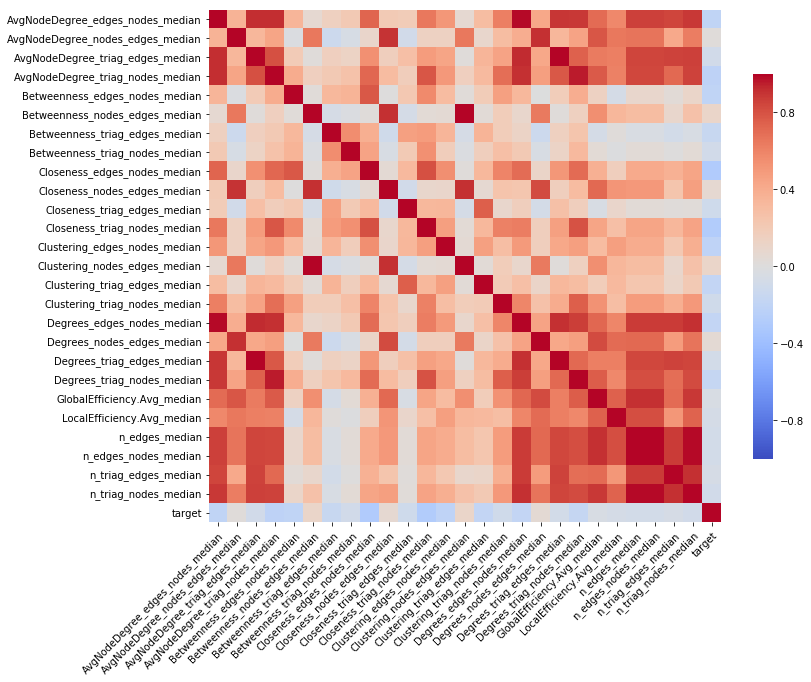

In [96]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_corr.values, cmap='coolwarm', square=True, vmin=-1, vmax=1, cbar_kws={"shrink": .7})
# plt.xlabel(feature_names)
plt.yticks(np.arange(len(feature_names)) + 0.5, feature_names, rotation=0, va="center")
plt.xticks(np.arange(len(feature_names)) + 0.5, feature_names, rotation=45, rotation_mode="anchor", ha="right")
plt.savefig('../pic/heatmap.png')
plt.tight_layout()

In [134]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedKFold

In [135]:
target = np.array(y_list)
ss = StandardScaler()

allowed_suffixes_list = ['nodes_edges', 'edges_nodes']

columns_filtered = [column for column in df.columns if any(suffix in column for suffix in allowed_suffixes_list)]
columns_all = list(df.columns)


In [136]:
rk = RepeatedKFold(n_splits=5, n_repeats=10)

lasso = Lasso(alpha=0.01)
rf = RandomForestClassifier(n_estimators=100, max_depth=5, n_jobs=-1)
lr = LogisticRegression(solver='lbfgs', max_iter=100)
svm = SVC(gamma='scale', kernel='rbf')

methods_list = [lr, rf, svm, lasso]
# method_names = ['LR']

In [141]:
df_list = []

for columns_list in [columns_all, columns_filtered]:
    train_normed = ss.fit_transform(df[columns_list].values)
    scoring_method = 'roc_auc'

    results_list = []

    for method in methods_list:
        method_name = method.__class__.__name__
        method_scores = cross_val_score(lr, X=train_normed, y=target, cv=rk, scoring=scoring_method)
        method_score_mean = method_scores.mean()
        method_score_std = method_scores.std()
        result = {
            'mean': method_score_mean,
            'std': method_score_std,
        }

        results_list.append(pd.Series(result, name=method_name))

    df_results = pd.DataFrame(results_list)
    df_list.append(df_results)
        

In [142]:
df_list

[                            mean       std
 LogisticRegression      0.556071  0.113683
 RandomForestClassifier  0.546120  0.130807
 SVC                     0.562471  0.091091
 Lasso                   0.558160  0.110987,
                             mean       std
 LogisticRegression      0.573746  0.116771
 RandomForestClassifier  0.590707  0.120677
 SVC                     0.581045  0.118538
 Lasso                   0.573020  0.094383]